# Cosmology derivation 

## Section 1: Setup the metric 

2     2
f[r]  R[t]         0                  0

                    2     2
0                  r  R[t]            0

                                       2     2       2
0                  0                  r  R[t]  Sin[θ]
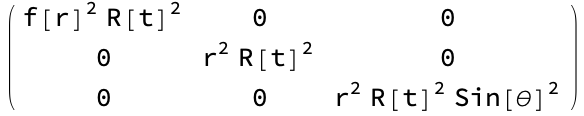

In [1]:
(* Defining coordinate system *)
coord = {r, θ, ϕ};
(* Set these variable for coordinate, hopefully mathematica will be \
smarter when we Simplify *)
(* Noted that e is an expansions parameter *)
$Assumptions = t ∈ Reals && r ∈ Reals && θ ∈ Reals && ϕ ∈ Reals && e ∈ Reals;
(* Defining the metric, with only hxy turned on *)
metric = DiagonalMatrix[{R[t]^2 f[r]^2, R[t]^2 r^2, R[t]^2 (r Sin[θ])^2}];
metricsign = 1;
metric // MatrixForm

In [10]:
(* Load the package from the folder which you put diffgeo.m, See e.g. \
Hartnoll's notebook or diffgeomanul.nb *)
SetDirectory["/Users/jamjang/Desktop/coscom/mathematica/tutorial"]
<< diffgeo.m

/Users/jamjang/Desktop/coscom/mathematica/tutorial

## Section 2 : The equation of motion, typical Einstein equation + cosmological constant

Einstein tensor, with both indices down.
Einstein := (Unprotect[Einstein]; 

 
>     Einstein = Simplify[RicciTensor - RicciScalar*(metric/2)]; Protect[Einstein];\
 
>    Einstein)
 


Attributes[Einstein]={Protected}
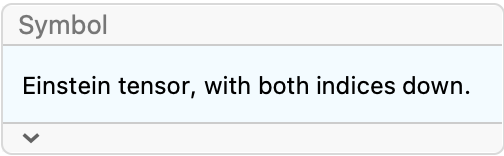

In [13]:
?Einstein

Riemann tensor, with first three indices down and fourth index up.
Riemann := (Unprotect[Riemann]; 

 
>     Riemann = With[{Christoffelt = Transpose[Christoffel, {3, 1, 2}]}, 

 
>       2*antisymmetrize[Transpose[Christoffelt . Christoffelt, {1, 3, 2}] - 

 
>          partial[Christoffelt], {1, 2}]]; Protect[Riemann]; Riemann)
 


Attributes[Riemann]={Protected}
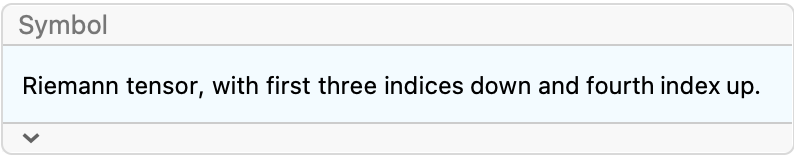

In [14]:
?Riemann

-2
{θ, ϕ, θ, ϕ}   1 - f[r]

                        -2
{ϕ, θ, θ, ϕ}   -1 + f[r]

                         -2        2
{θ, ϕ, ϕ, θ}   (-1 + f[r]  ) Sin[θ]

                        -2        2
{ϕ, θ, ϕ, θ}   (1 - f[r]  ) Sin[θ]

                 r f'[r]
               -(-------)
                      3
{r, θ, θ, r}      f[r]

               r f'[r]
               -------
                    3
{θ, r, θ, r}    f[r]

                 f'[r]
{θ, r, r, θ}   -(------)
{ϕ, r, r, ϕ}     r f[r]

               f'[r]
{r, θ, r, θ}   ------
{r, ϕ, r, ϕ}   r f[r]

                         2
                 r Sin[θ]  f'[r]
               -(---------------)
                          3
{r, ϕ, ϕ, r}          f[r]

                       2
               r Sin[θ]  f'[r]
               ---------------
                        3
{ϕ, r, ϕ, r}        f[r]
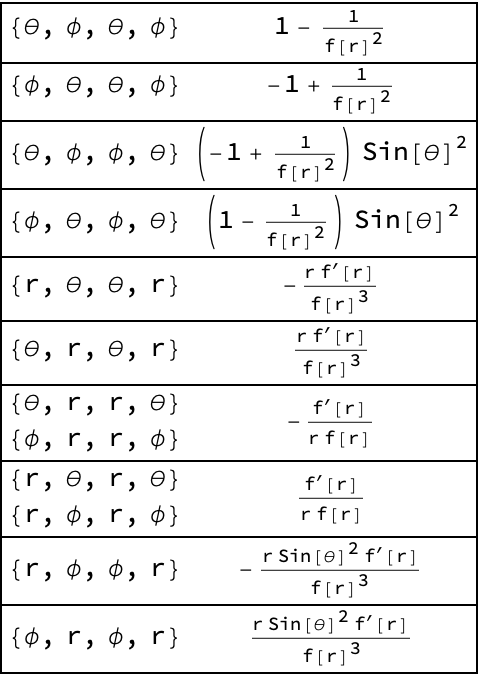

In [15]:
display[Riemann] // FullSimplify

3
2 (-f[r] + f[r]  + 2 r f'[r])
-----------------------------
        2     3     2
       r  f[r]  R[t]
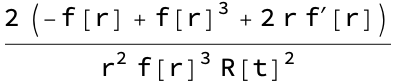

In [16]:
RicciScalar // FullSimplify

Sqrt[6] Sqrt[r]
{{f -> Function[{r}, -(-------------------------)]}, 
                                     3
                       Sqrt[6 r - C r  + 6 C[1]]
 
                             Sqrt[6] Sqrt[r]
>   {f -> Function[{r}, -------------------------]}}
                                      3
                        Sqrt[6 r - C r  + 6 C[1]]
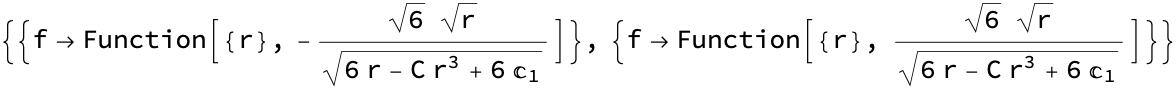

In [17]:
DSolve[-((2 (-f[r] + f[r]^3 + 2 r Derivative[1][f][r]))/((r^2) (f[r]^3) )) == -C, f, r] // FullSimplify

## $\frac{1}{ \sqrt{1 - \frac{C}{6}r^2 + \frac{C[1]}{r}}}$

Christoffel symbol, with the upper index first.
Christoffel = {{{Derivative[1][f][r]/f[r], 0, 0}, {0, -(r/f[r]^2), 0}, 

 
>      {0, 0, -((r*Sin[θ]^2)/f[r]^2)}}, {{0, r^(-1), 0}, {r^(-1), 0, 0}, 

 
>      {0, 0, -(Cos[θ]*Sin[θ])}}, {{0, 0, r^(-1)}, {0, 0, Cot[θ]}, {r^(-1), Cot[θ], 0}}}
 


Attributes[Christoffel]={Protected}
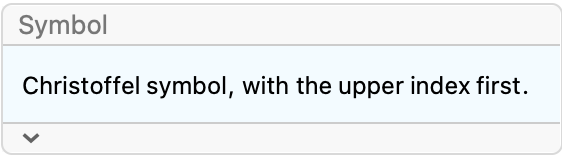

In [18]:
?Christoffel

{θ, r, θ}
{θ, θ, r}   1
{ϕ, r, ϕ}   -
{ϕ, ϕ, r}   r

{ϕ, θ, ϕ}
{ϕ, ϕ, θ}   Cot[θ]

                r
            -(-----)
                  2
{r, θ, θ}     f[r]

{θ, ϕ, ϕ}   -(Cos[θ] Sin[θ])

                      2
              r Sin[θ]
            -(---------)
                    2
{r, ϕ, ϕ}       f[r]

            f'[r]
            -----
{r, r, r}   f[r]
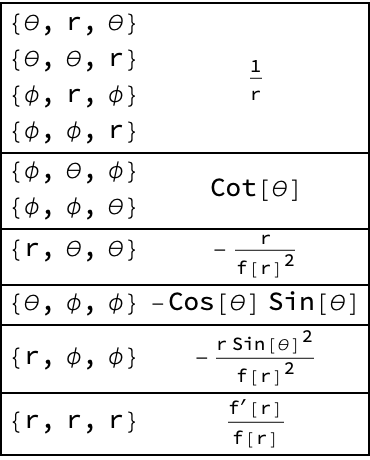

In [19]:
display[Christoffel]